In [51]:
# install dependencies
import pandas as pd
import seaborn as sns
from pathlib import Path
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [53]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [54]:
df.shape

(545, 13)

In [55]:
# display heatmap of correlation
#sns.heatmap(df.corr(), annot=True)

In [56]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# prepocess categorical data
# one hot encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [57]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [58]:
# split price and features
X = df.drop('price', axis=1)
y = df['price']


In [50]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the models
random_forest = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
elas = ElasticNet()
linear = LinearRegression()

# Create a pipeline for each model
random_forest_pipe = Pipeline([('scaler', StandardScaler()), ('random_forest', random_forest)])
ridge_pipe = Pipeline([('scaler', StandardScaler()), ('ridge', ridge)])
lasso_pipe = Pipeline([('scaler', StandardScaler()), ('lasso', lasso)])
elas_pipe = Pipeline([('scaler', StandardScaler()), ('elas', elas)])
linear_pipe = Pipeline([('scaler', StandardScaler()), ('linear', linear)])

# Define the hyperparameters for each model
random_forest_params = {'random_forest__n_estimators': [100, 200], 'random_forest__max_depth': [None, 10, 20], 'random_forest__min_samples_split': [2, 5], 'random_forest__min_samples_leaf': [1, 2]}
ridge_params = {'ridge__alpha': [0.1, 0.5, 1.0, 1.5]}
lasso_params = {'lasso__alpha': [0.1, 0.5, 1.0, 1.5]}
elas_params = {'elas__alpha': [0.1, 0.5, 1.0, 1.5], 'elas__l1_ratio': [0.5, 0.7, 0.9]}
linear_params = {'linear__fit_intercept': [True, False]}

# Create a dictionary of models and their respective hyperparameters
models = {'Random Forest Regression': (random_forest_pipe, random_forest_params),
          'Ridge Regression': (ridge_pipe, ridge_params),
          'Lasso Regression': (lasso_pipe, lasso_params),
          'Elastic Net Regression': (elas_pipe, elas_params),
          'Linear Regression': (linear_pipe, linear_params)}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an empty dictionary to store the fitted models
fitted_models = {}

# Train the models
for name, (model, params) in models.items():
    print(f'Training {name}...')
    model = GridSearchCV(model, params, cv=5, verbose=1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(f'{name} trained successfully.')


Training Random Forest Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest Regression trained successfully.
Training Ridge Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Ridge Regression trained successfully.
Training Lasso Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Lasso Regression trained successfully.
Training Elastic Net Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Elastic Net Regression trained successfully.
Training Linear Regression...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Linear Regression trained successfully.


In [59]:
# import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_metrics = pd.DataFrame(columns=['MAE', 'MSE', 'R2'])

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_metrics.loc[name] = [mae, mse, r2]

# print the model metrics dataframe
model_metrics

,MAE,MSE,R2
Random Forest Regression,1.028543e+06,1.952886e+12,0.613640
Ridge Regression,9.697663e+05,1.755104e+12,0.652769
Lasso Regression,9.700434e+05,1.754321e+12,0.652924
Elastic Net Regression,9.665317e+05,1.786560e+12,0.646546
Linear Regression,9.700434e+05,1.754319e+12,0.652924


In [60]:
new_input_features = pd.DataFrame({
    'area': [7420],
    'bedrooms': [4],
    'bathrooms': [2],
    'stories': [3],
    'parking': [2],
    'mainroad_yes': [1],
    'guestroom_yes': [0],
    'basement_yes': [0],
    'hotwaterheating_yes': [0],
    'airconditioning_yes': [1],
    'prefarea_yes': [1],
    'furnishingstatus_semi-furnished': [0],
    'furnishingstatus_unfurnished': [0]
})
predicted_price = model.predict(new_input_features)

print(f"Predicted Housing Price: {predicted_price[0]}")

Predicted Housing Price: 7968276.126387373


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    uint8
 7   guestroom_yes                    545 non-null    uint8
 8   basement_yes                     545 non-null    uint8
 9   hotwaterheating_yes              545 non-null    uint8
 10  airconditioning_yes              545 non-null    uint8
 11  prefarea_yes                     545 non-null    uint8
 12  furnishingstatus_semi-furnished  545 non-null    u

In [62]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.858716,0.177982,0.350459,0.045872,0.315596,0.234862,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.348635,0.382849,0.477552,0.209399,0.465180,0.424302,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
df.isnull().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [64]:
df.groupby('price').mean()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,,,,,,,,,,,,,
1750000,3460.0,2.666667,1.0,1.333333,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.666667
1767150,2400.0,3.000000,1.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
1820000,3000.0,2.000000,1.0,1.000000,2.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000
1855000,2990.0,2.000000,1.0,1.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
1890000,2674.5,2.500000,1.0,1.500000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10850000,7500.0,3.000000,3.0,1.000000,2.0,1.000000,0.0,1.0,0.0,1.0,1.0,1.0,0.000000
11410000,7420.0,4.000000,1.0,2.000000,2.0,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.000000
12215000,7500.0,4.000000,2.0,2.000000,3.0,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.000000


price                                 Axes(0.125,0.712609;0.168478x0.167391)
area                               Axes(0.327174,0.712609;0.168478x0.167391)
bedrooms                           Axes(0.529348,0.712609;0.168478x0.167391)
bathrooms                          Axes(0.731522,0.712609;0.168478x0.167391)
stories                               Axes(0.125,0.511739;0.168478x0.167391)
parking                            Axes(0.327174,0.511739;0.168478x0.167391)
mainroad_yes                       Axes(0.529348,0.511739;0.168478x0.167391)
guestroom_yes                      Axes(0.731522,0.511739;0.168478x0.167391)
basement_yes                           Axes(0.125,0.31087;0.168478x0.167391)
hotwaterheating_yes                 Axes(0.327174,0.31087;0.168478x0.167391)
airconditioning_yes                 Axes(0.529348,0.31087;0.168478x0.167391)
prefarea_yes                        Axes(0.731522,0.31087;0.168478x0.167391)
furnishingstatus_semi-furnished           Axes(0.125,0.11;0.168478x0.167391)

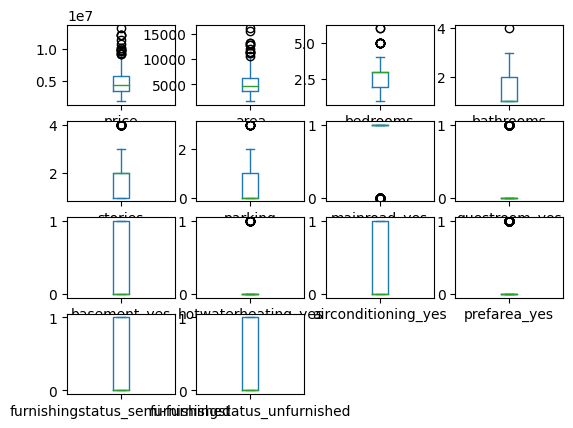

In [66]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

<Axes: >

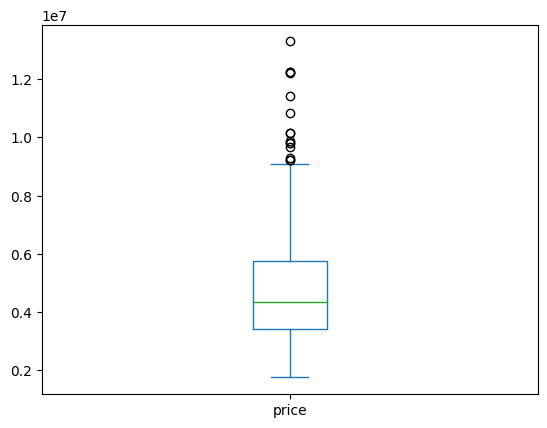

In [68]:
#outliers
df['price'].plot(kind ='box')


<Axes: >

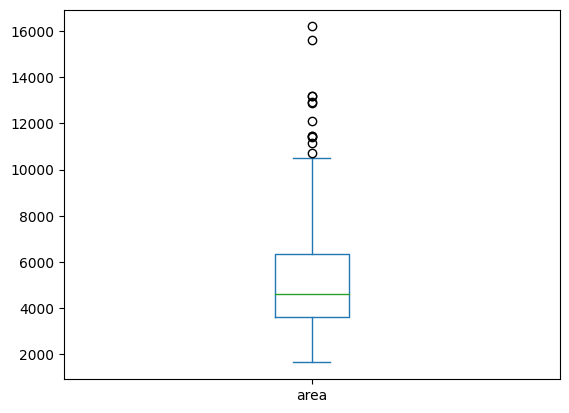

In [69]:
df['area'].plot(kind ='box')

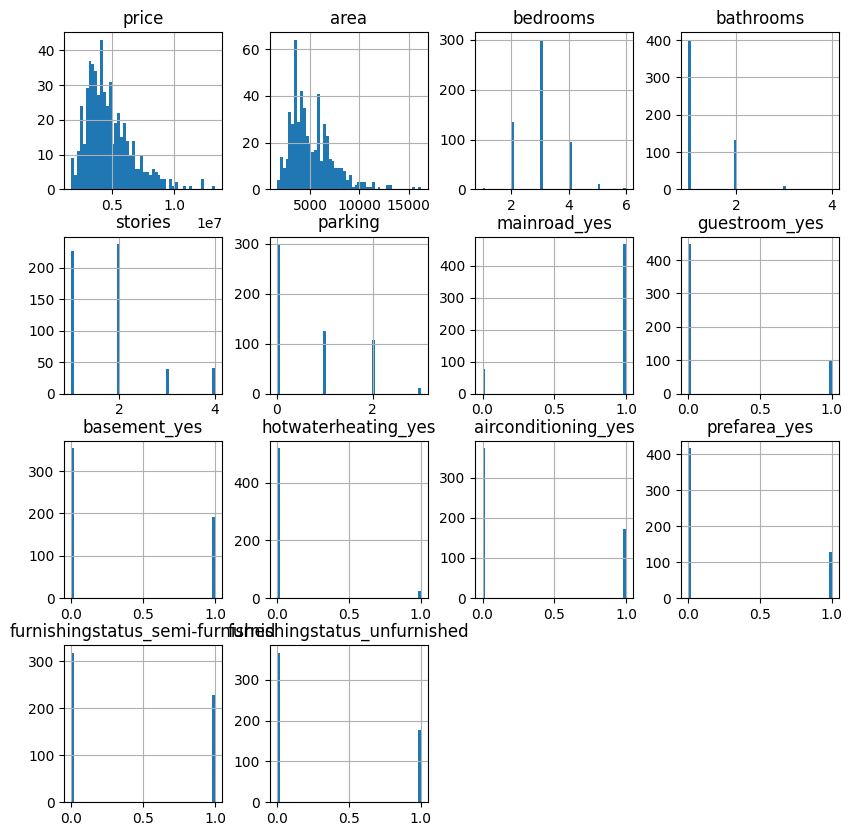

In [70]:
df.hist(figsize=(10,10),bins=50)
plt.show()

In [71]:
df['price'].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425